In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob

In [11]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [12]:
def wipl_radiation_output_reader(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
          
    if len(path_to_file.split('/')[-1].split('_'))==8:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7].split('.')[0],
                  'WingDomain' : 'NA'
                  }
    elif len(path_to_file.split('/')[-1].split('_'))==9:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7],
                  'WingDomain' : path_to_file.split('/')[-1].split('_')[8].split('.')[0]
                  }
    
    
    return ra1_df, ra1_dict

For Paper Body Only

In [13]:
#Data
#Min and Max Only Body for paper but plot all 4 too look at.
data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Pure Decimations/**/Only_Body/'

In [14]:
files=glob(data_dir+'*.ra1',recursive=True)
files.sort()

radiation_data=[]
radiation_metadata=[]
for f in files:
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ra1_df, ra1_dict)= wipl_radiation_output_reader(f)
    radiation_data.append(ra1_df)
    radiation_metadata.append(ra1_dict)

LepidopteraNoctuidaeMoth_12_OnlyBody_na_0008_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0016_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0031_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0063_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0125_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0375_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0500_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0625_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0750_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0875_1000_94_MirkLBG


/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


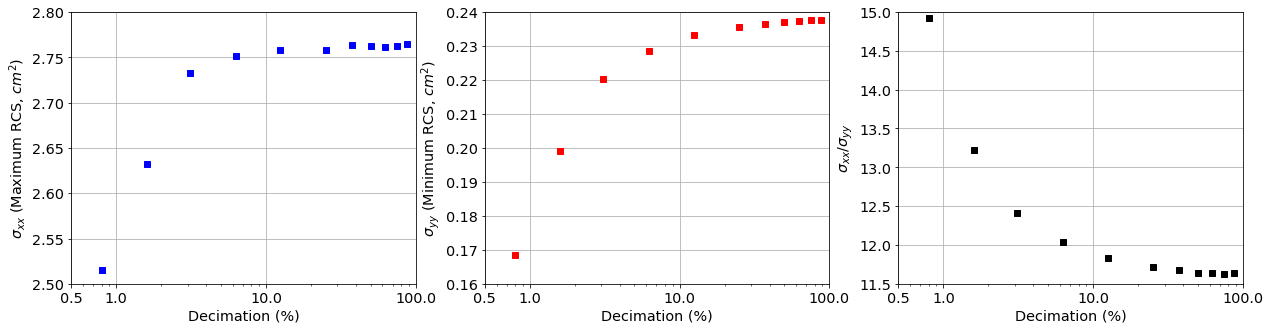

In [65]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(radiation_metadata[idx]['Resolution'])

fig, axs = plt.subplots(1, 3, figsize=[21,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].semilogx(n, max_r, 'bs')
axs[0].grid(True)
axs[0].set_ylim([2.5,2.8])
axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'$\sigma_{xx}$'+' (Maximum RCS, '+ r'$cm^{2}$)' )
axs[0].set(xlabel='Decimation (%)')

axs[1].semilogx(n, min_r, 'rs')
axs[1].grid(True)
axs[1].set_ylim([0.16, 0.24])
axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'$\sigma_{yy}$'+' (Minimum RCS, '+ r'$cm^{2}$)')
axs[1].set(xlabel='Decimation (%)')

axs[2].semilogx(n, max_min_r, 'ks' )
axs[2].grid(True)
axs[2].set_ylim([11.5, 15])
axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'$\sigma_{xx}/\sigma_{yy}$')
axs[2].set(xlabel='Decimation (%)')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

from matplotlib.ticker import FormatStrFormatter

for i in axs:
    i.set_xticks([0.5, 1,10, 100])
    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure6.svg', format='svg', dpi=1200)



/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anacon

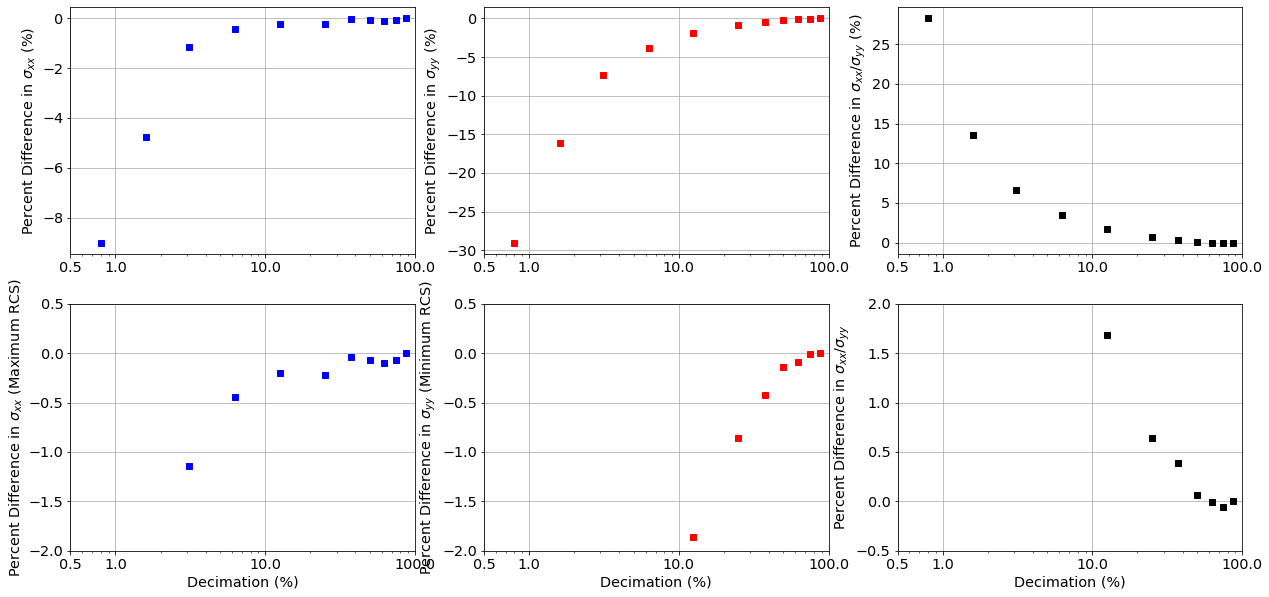

In [64]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(radiation_metadata[idx]['Resolution'])

fig, axs = plt.subplots(2, 3, figsize=[21,10], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0,0].semilogx(n, (np.array(max_r)-max_r[-1])/max_r[-1]*100, 'bs')
axs[0,0].grid(True)
#axs[0,0].set_ylim([2.5,2.8])
axs[0,0].set_xlim([0,100])
axs[0,0].set(ylabel=r'Percent Difference in $\sigma_{xx}$'+' (%)' )
axs[0,0].set(xlabel='')

axs[0,1].semilogx(n, (np.array(min_r)-min_r[-1])/min_r[-1]*100, 'rs')
axs[0,1].grid(True)
#axs[0,1].set_ylim([0.16, 0.24])
axs[0,1].set_xlim([0,100])
axs[0,1].set(ylabel=r'Percent Difference in $\sigma_{yy}$'+' (%)')
axs[0,1].set(xlabel='')

axs[0,2].semilogx(n,   (np.array(max_min_r)-max_min_r[-1])/max_min_r[-1]*100, 'ks' )
axs[0,2].grid(True)
#axs[0,2].set_ylim([11.5, 15])
axs[0,2].set_xlim([0,100])
axs[0,2].set(ylabel=r'Percent Difference in $\sigma_{xx}/\sigma_{yy}$ (%)')
axs[0,2].set(xlabel='')


axs[1,0].semilogx(n, (np.array(max_r)-max_r[-1])/max_r[-1]*100, 'bs')
axs[1,0].grid(True)
axs[1,0].set_ylim([-2,0.5])
axs[1,0].set_xlim([0,100])
axs[1,0].set(ylabel=r'Percent Difference in $\sigma_{xx}$'+' (Maximum RCS)' )
axs[1,0].set(xlabel='Decimation (%)')

axs[1,1].semilogx(n, (np.array(min_r)-min_r[-1])/min_r[-1]*100, 'rs')
axs[1,1].grid(True)
axs[1,1].set_ylim([-2, 0.5])
axs[1,1].set_xlim([0,100])
axs[1,1].set(ylabel=r'Percent Difference in $\sigma_{yy}$'+' (Minimum RCS)')
axs[1,1].set(xlabel='Decimation (%)')

axs[1,2].semilogx(n,   (np.array(max_min_r)-max_min_r[-1])/max_min_r[-1]*100, 'ks' )
axs[1,2].grid(True)
axs[1,2].set_ylim([-0.5,2])
axs[1,2].set_xlim([0,100])
axs[1,2].set(ylabel=r'Percent Difference in $\sigma_{xx}/\sigma_{yy}$')
axs[1,2].set(xlabel='Decimation (%)')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

from matplotlib.ticker import FormatStrFormatter

for i in axs:
    for j in i:
        j.set_xticks([0.5, 1,10, 100])
        j.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure7.svg', format='svg', dpi=1200)



/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


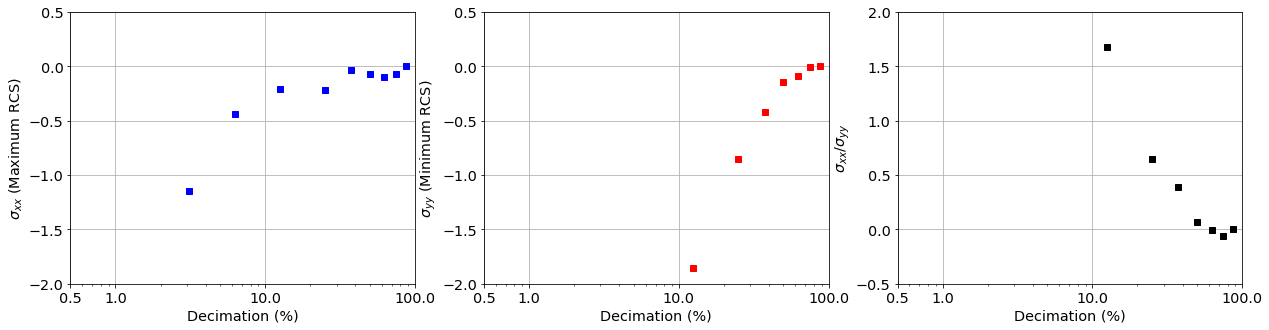

In [38]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(radiation_metadata[idx]['Resolution'])

fig, axs = plt.subplots(1, 3, figsize=[21,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].semilogx(n, (np.array(max_r)-max_r[-1])/max_r[-1]*100, 'bs')
axs[0].grid(True)
axs[0].set_ylim([-2,0.5])
axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'$\sigma_{xx}$'+' (Maximum RCS)' )
axs[0].set(xlabel='Decimation (%)')

axs[1].semilogx(n, (np.array(min_r)-min_r[-1])/min_r[-1]*100, 'rs')
axs[1].grid(True)
axs[1].set_ylim([-2, 0.5])
axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'$\sigma_{yy}$'+' (Minimum RCS)')
axs[1].set(xlabel='Decimation (%)')

axs[2].semilogx(n,   (np.array(max_min_r)-max_min_r[-1])/max_min_r[-1]*100, 'ks' )
axs[2].grid(True)
axs[2].set_ylim([-0.5,2])
axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'$\sigma_{xx}/\sigma_{yy}$')
axs[2].set(xlabel='Decimation (%)')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

from matplotlib.ticker import FormatStrFormatter

for i in axs:
    i.set_xticks([0.5, 1,10, 100])
    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure5.svg', format='svg', dpi=1200)



array([-0.24949245, -0.13171571, -0.031686  , -0.01222929, -0.00567367,
       -0.00601601, -0.0010032 , -0.00204574, -0.0026562 , -0.001885  ,
        0.        ])

#####

For Internal Usage All Body Types

In [7]:
#Data
#Min and Max Only Body for paper but plot all 4 too look at.
Shaved_data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Pure Decimations/**/Shaved/'

Only_Body_data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Pure Decimations/**/Only_Body/'
Wingless_data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Pure Decimations/**/Wingless/'
Full_data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Pure Decimations/**/Full/'

In [205]:
Shaved_files=glob(Shaved_data_dir+'*.ra1',recursive=True)
Shaved_files.sort()

Only_Body_files=glob(Only_Body_data_dir+'*.ra1',recursive=True)
Only_Body_files.sort()

Full_files=glob(Full_data_dir+'*.ra1',recursive=True)
Full_files.sort()

Wingless_files=glob(Wingless_data_dir+'*.ra1',recursive=True)
Wingless_files.sort()


files=Shaved_files+Only_Body_files+Wingless_files+Full_files
radiation_data=[]
radiation_metadata=[]
for f in files:
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ra1_df, ra1_dict)= wipl_radiation_output_reader(f)
    radiation_data.append(ra1_df)
    radiation_metadata.append(ra1_dict)

LepidopteraNoctuidaeMoth_12_Shaved_na_0008_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_Shaved_na_0016_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_Shaved_na_0031_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_Shaved_na_0063_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_Shaved_na_0125_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_Shaved_na_0250_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_Shaved_na_0375_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0008_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0016_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0031_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0063_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0125_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0250_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0375_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0500_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_na_0625_1000_94_MirkLBG
LepidopteraNoctuidaeMoth_12_OnlyBody_n

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


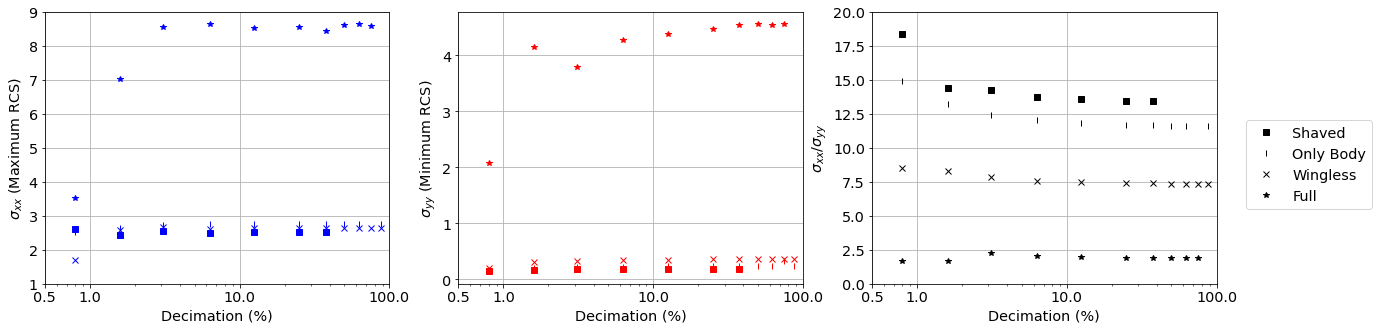

In [212]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(radiation_metadata[idx]['Resolution'])

fig, axs = plt.subplots(1, 3, figsize=[21,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].semilogx(n[0:7], max_r[0:7], 'bs', label='Shaved' )
axs[0].semilogx(n[7:18], max_r[7:18], 'b|', label='Only Body' )
axs[0].semilogx(n[18:29], max_r[18:29], 'bx', label='Wingless' )
axs[0].semilogx(n[29:-1], max_r[29:-1], 'b*', label='Full' )
axs[0].grid(True)
axs[0].set_ylim([1,9])
axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'$\sigma_{xx}$'+' (Maximum RCS)' )
axs[0].set(xlabel='Decimation (%)')

axs[1].semilogx(n[0:7], min_r[0:7], 'rs', label='Shaved')
axs[1].semilogx(n[7:18], min_r[7:18], 'r|', label='Only Body')
axs[1].semilogx(n[18:29], min_r[18:29], 'rx', label='Wingless')
axs[1].semilogx(n[29:-1], min_r[29:-1], 'r*', label='Full')
axs[1].grid(True)
#axs[1].set_ylim([0.16, 0.24])
axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'$\sigma_{yy}$'+' (Minimum RCS)')
axs[1].set(xlabel='Decimation (%)')

axs[2].semilogx(n[0:7], max_min_r[0:7], 'ks', label='Shaved' )
axs[2].semilogx(n[7:18], max_min_r[7:18], 'k|', label='Only Body' )
axs[2].semilogx(n[18:29], max_min_r[18:29], 'kx', label='Wingless' )
axs[2].semilogx(n[29:-1], max_min_r[29:-1], 'k*', label='Full' )
axs[2].grid(True)
axs[2].set_ylim([0, 20])
axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'$\sigma_{xx}/\sigma_{yy}$')
axs[2].set(xlabel='Decimation (%)')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

from matplotlib.ticker import FormatStrFormatter

for i in axs:
    i.set_xticks([0.5, 1,10, 100])
    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)





/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


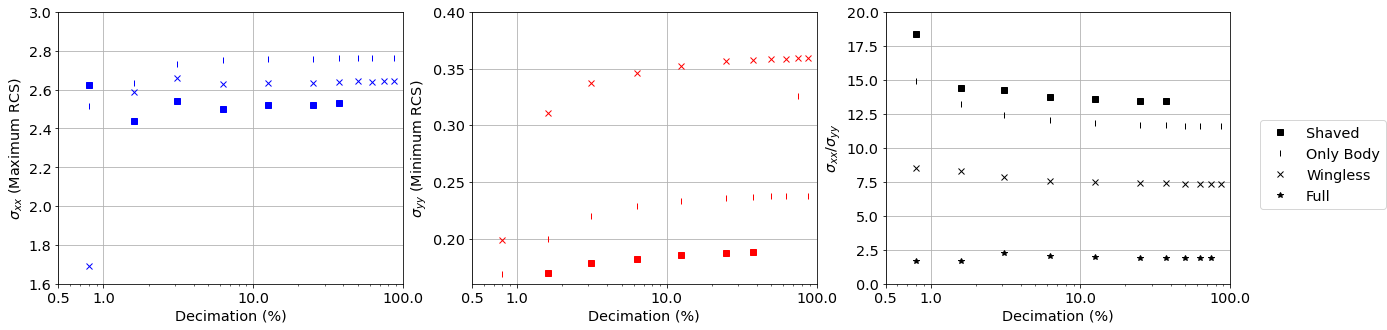

In [218]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(radiation_metadata[idx]['Resolution'])

fig, axs = plt.subplots(1, 3, figsize=[21,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].semilogx(n[0:7], max_r[0:7], 'bs', label='Shaved' )
axs[0].semilogx(n[7:18], max_r[7:18], 'b|', label='Only Body' )
axs[0].semilogx(n[18:29], max_r[18:29], 'bx', label='Wingless' )
axs[0].semilogx(n[29:-1], max_r[29:-1], 'b*', label='Full' )
axs[0].grid(True)
axs[0].set_ylim([1.6,3])
axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'$\sigma_{xx}$'+' (Maximum RCS)' )
axs[0].set(xlabel='Decimation (%)')

axs[1].semilogx(n[0:7], min_r[0:7], 'rs', label='Shaved')
axs[1].semilogx(n[7:18], min_r[7:18], 'r|', label='Only Body')
axs[1].semilogx(n[18:29], min_r[18:29], 'rx', label='Wingless')
axs[1].semilogx(n[29:-1], min_r[29:-1], 'r*', label='Full')
axs[1].grid(True)
axs[1].set_ylim([0.16, 0.4])
axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'$\sigma_{yy}$'+' (Minimum RCS)')
axs[1].set(xlabel='Decimation (%)')

axs[2].semilogx(n[0:7], max_min_r[0:7], 'ks', label='Shaved' )
axs[2].semilogx(n[7:18], max_min_r[7:18], 'k|', label='Only Body' )
axs[2].semilogx(n[18:29], max_min_r[18:29], 'kx', label='Wingless' )
axs[2].semilogx(n[29:-1], max_min_r[29:-1], 'k*', label='Full' )
axs[2].grid(True)
axs[2].set_ylim([0, 20])
axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'$\sigma_{xx}/\sigma_{yy}$')
axs[2].set(xlabel='Decimation (%)')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

from matplotlib.ticker import FormatStrFormatter

for i in axs:
    i.set_xticks([0.5, 1,10, 100])
    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)



